In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housing = pd.read_csv('Housing_dataset.csv')

<AxesSubplot:>

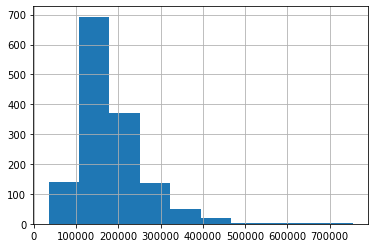

In [3]:
# Histogram 

housing['SalePrice'].hist()

## sns.distplot(housing['SalePrice'], kde=False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

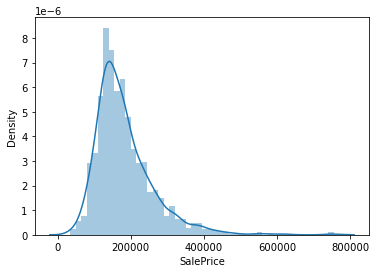

In [4]:
# Probability distribution

sns.distplot(housing['SalePrice'])

In [5]:
# Skewness and Kurtosis

print("Skewness:", housing['SalePrice'].skew())
print("Kurtosis:", housing['SalePrice'].kurt())

Skewness: 1.8646120239750106
Kurtosis: 6.432852054835754


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

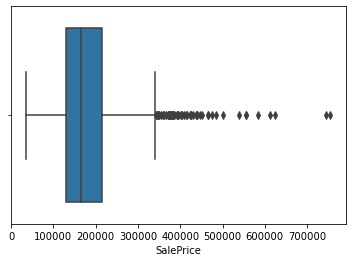

In [6]:
# BoXplot

sns.boxplot(housing['SalePrice'])

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

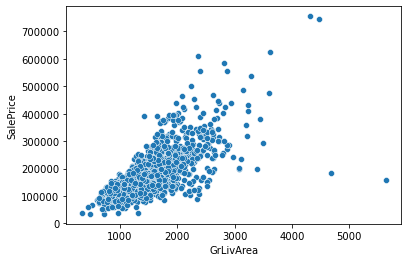

In [7]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=housing)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

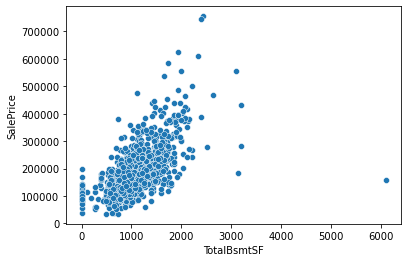

In [8]:
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=housing)

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

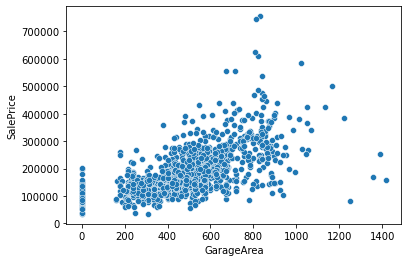

In [9]:
sns.scatterplot(x='GarageArea', y='SalePrice', data=housing)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

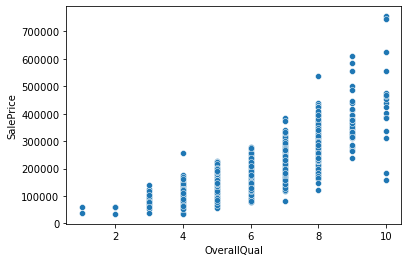

In [10]:
sns.scatterplot(x='OverallQual', y='SalePrice', data=housing)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

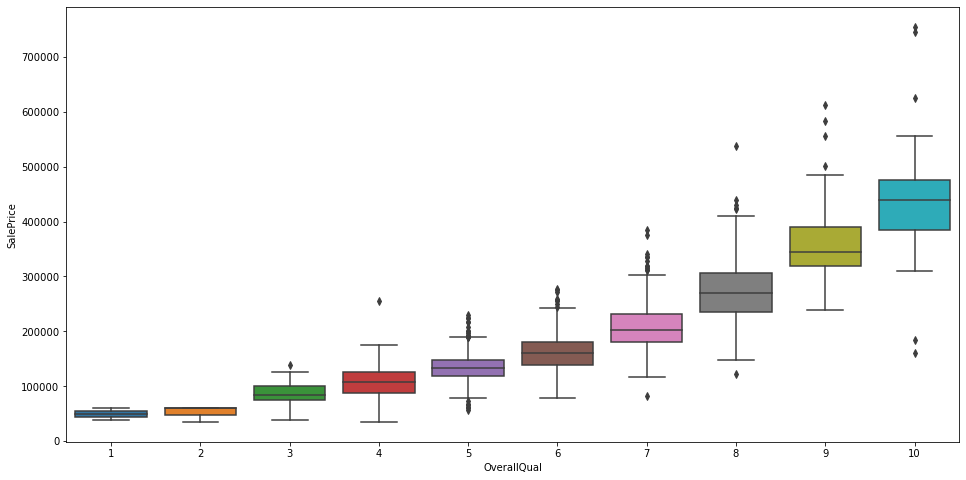

In [11]:
# Box plot between 'OverallQual' and 'SalePrice'

plt.subplots(figsize=(16, 8))
sns.boxplot('OverallQual', 'SalePrice', data = housing)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

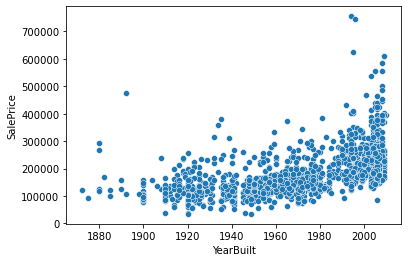

In [12]:
# Scatter plot between 'YearBuilt' and 'SalePrice'

sns.scatterplot(x='YearBuilt', y='SalePrice', data=housing)

#### Correlation matrix (heatmap style)

<AxesSubplot:>

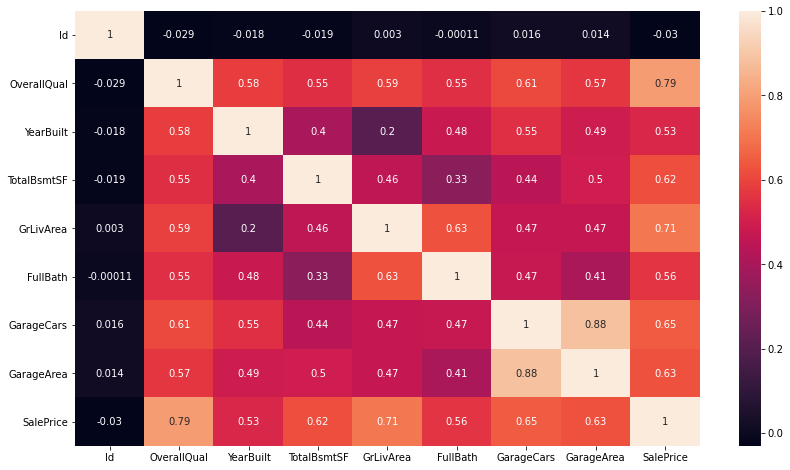

In [13]:
plt.figure(figsize=(14,8))
sns.heatmap(housing.corr(),annot=True)

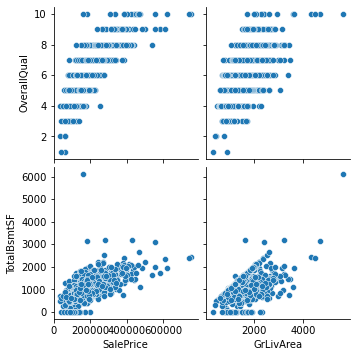

In [14]:
sns.pairplot(data=housing,x_vars=["SalePrice", "GrLivArea"],y_vars=["OverallQual", "TotalBsmtSF"])

# Missing data

In [15]:
#missing data

total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()*100).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data.head(20)

,Total,Percent
MiscFeature,1366,96.332863
Fence,1148,80.959097
GarageType,143,10.084626
Electrical,1,0.070522
Id,0,0.000000
OverallQual,0,0.000000
YearBuilt,0,0.000000
TotalBsmtSF,0,0.000000
GrLivArea,0,0.000000
FullBath,0,0.000000


In [16]:
housing.drop(columns=['MiscFeature', 'Fence'],inplace=True)

In [17]:
housing.count()

Id             1418
OverallQual    1418
YearBuilt      1418
TotalBsmtSF    1418
Electrical     1417
GrLivArea      1418
FullBath       1418
GarageType     1275
GarageCars     1418
GarageArea     1418
SalePrice      1418
dtype: int64

In [18]:
# See that row where value for 'Electrical' column is null

housing[housing['Electrical'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
1339,1340,5,2006,384,NaN,1394,2,BuiltIn,2,400,167500


In [19]:
# Lets make a new data frame of a few rows (hard-copy)

df_electrical_missing = housing.iloc[1337:1342].copy()

In [20]:
df_electrical_missing

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
1337,1338,5,1941,984,SBrkr,1604,2,Detchd,2,660,117000
1338,1339,6,1973,483,SBrkr,987,1,Detchd,1,264,83000
1339,1340,5,2006,384,NaN,1394,2,BuiltIn,2,400,167500
1340,1341,3,1914,864,FuseF,864,1,Detchd,1,200,58500
1341,1342,6,1970,1205,SBrkr,2117,2,Attchd,2,550,237500


In [21]:
# Use last valid observation to fill gap
df_electrical_missing['Electrical'].fillna(method='ffill')

1337    SBrkr
1338    SBrkr
1339    SBrkr
1340    FuseF
1341    SBrkr
Name: Electrical, dtype: object

In [22]:
# Use next valid observation to fill gap 
df_electrical_missing['Electrical'].fillna(method='backfill')

1337    SBrkr
1338    SBrkr
1339    FuseF
1340    FuseF
1341    SBrkr
Name: Electrical, dtype: object

In [23]:
# Location based replacement
df_electrical_missing.loc[1339,'Electrical'] = 'SBrkr'
df_electrical_missing

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
1337,1338,5,1941,984,SBrkr,1604,2,Detchd,2,660,117000
1338,1339,6,1973,483,SBrkr,987,1,Detchd,1,264,83000
1339,1340,5,2006,384,SBrkr,1394,2,BuiltIn,2,400,167500
1340,1341,3,1914,864,FuseF,864,1,Detchd,1,200,58500
1341,1342,6,1970,1205,SBrkr,2117,2,Attchd,2,550,237500


In [24]:
## Lets drop the rows with missing value in 'Electrical' column
housing.dropna(subset=['Electrical'], inplace=True)

In [25]:
housing.isnull().sum()

Id               0
OverallQual      0
YearBuilt        0
TotalBsmtSF      0
Electrical       0
GrLivArea        0
FullBath         0
GarageType     143
GarageCars       0
GarageArea       0
SalePrice        0
dtype: int64

In [26]:
## Lets see those rows where the 'GarageType' is null

housing[housing['GarageType'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
8,9,5,1939,991,SBrkr,1077,1,NaN,1,205,118000
22,23,5,1968,1060,SBrkr,1060,1,NaN,1,270,154000
26,27,5,1957,1484,SBrkr,1600,1,NaN,1,319,207500
37,38,4,1955,0,FuseP,1152,2,NaN,0,0,82000
39,40,5,1959,1350,SBrkr,1328,1,NaN,1,308,170000
...,...,...,...,...,...,...,...,...,...,...,...
1387,1388,5,1940,788,SBrkr,804,1,NaN,1,240,119000
1407,1408,5,1970,630,SBrkr,630,1,NaN,0,0,92000
1408,1409,5,1974,896,SBrkr,1792,2,NaN,0,0,136000
1411,1412,5,2006,1140,SBrkr,1140,1,NaN,0,0,84500


In [27]:
housing.groupby(['GarageType','GarageCars'])['GarageCars'].count()

GarageType  GarageCars
2Types      2               1
            3               4
            4               1
Attchd      1             105
            2             556
            3             138
            4               1
Basment     1               8
            2              11
BuiltIn     1               8
            2              48
            3              30
CarPort     1               3
            2               6
Detchd      1             178
            2             164
            3               9
            4               3
Name: GarageCars, dtype: int64

<AxesSubplot:xlabel='GarageType', ylabel='count'>

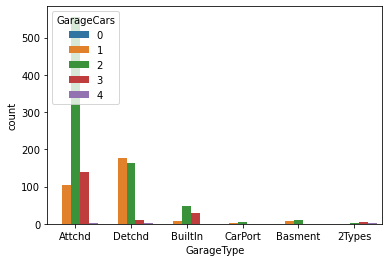

In [28]:
sns.countplot(x='GarageType', hue='GarageCars', data=housing)

<AxesSubplot:xlabel='GarageCars', ylabel='count'>

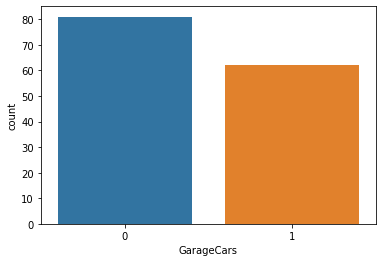

In [29]:
sns.countplot(x='GarageCars', data=housing[housing['GarageType'].isnull()])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GarageCars', ylabel='GarageArea'>

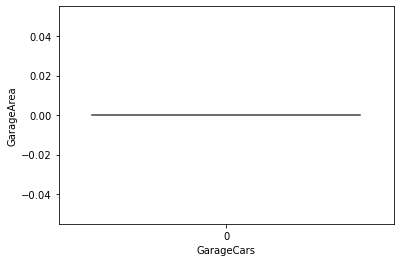

In [30]:
sns.violinplot('GarageCars','GarageArea',data=housing[housing['GarageCars']==0])

In [31]:
housing[housing['GarageCars']==0]['GarageArea'].value_counts()

0    81
Name: GarageArea, dtype: int64

In [32]:
housing['GarageType'] = np.where(housing['GarageCars'] == 1 & housing['GarageType'].isnull(),'Detchd', housing['GarageType'])
housing['GarageType'] = np.where(housing['GarageCars'] == 0 & housing['GarageType'].isnull(),'NoGarage', housing['GarageType'])

In [33]:
housing.count()

Id             1417
OverallQual    1417
YearBuilt      1417
TotalBsmtSF    1417
Electrical     1417
GrLivArea      1417
FullBath       1417
GarageType     1417
GarageCars     1417
GarageArea     1417
SalePrice      1417
dtype: int64

# Outliers detection and treatment

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

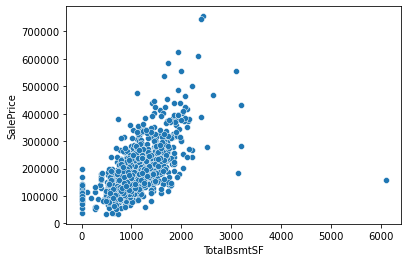

In [34]:
# Bivariate analysis between 'TotalBsmtSF' and 'SalePrice'

sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=housing)

In [35]:
## Lets sort the data by "TotalBsmtSF" in the descending order

housing.sort_values(by = 'TotalBsmtSF', ascending = False)[:2]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
1260,1261,10,2008,6110,SBrkr,5642,2,Attchd,2,1418,160000
313,314,8,2003,3206,SBrkr,1629,2,Attchd,3,880,284000


In [36]:
housing.drop(housing[housing['Id'] == 1261].index, inplace=True)

In [37]:
housing.sort_values(by = 'TotalBsmtSF', ascending = False)[:2]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
313,314,8,2003,3206,SBrkr,1629,2,Attchd,3,880,284000
475,476,8,1992,3200,SBrkr,3228,3,Attchd,2,546,430000


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

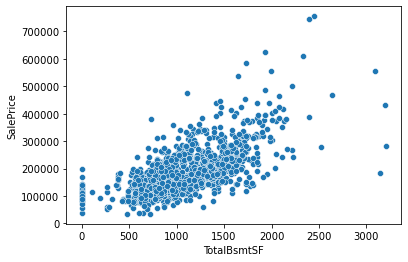

In [38]:
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=housing)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

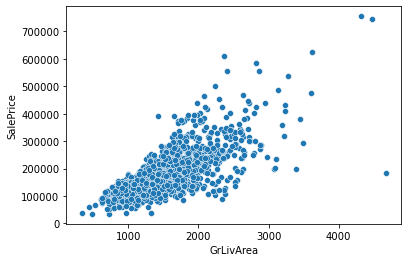

In [39]:
# Bivariate analysis between 'GrLivArea' and 'SalePrice'

sns.scatterplot(x='GrLivArea',y='SalePrice',data=housing)

In [40]:
housing.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
500,501,10,2007,3138,SBrkr,4676,3,BuiltIn,3,884,184750
1147,1148,10,1996,2396,SBrkr,4476,3,Attchd,3,813,745000


In [41]:
a = housing[(housing['GrLivArea'] > 4000) & (housing['SalePrice'] < 300000)]
housing.drop(a.index, inplace=True)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

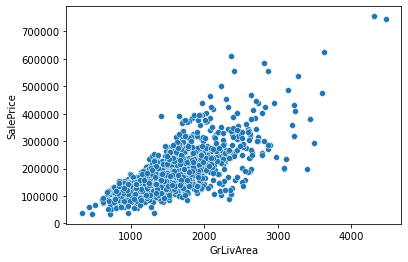

In [42]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=housing)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GrLivArea'>

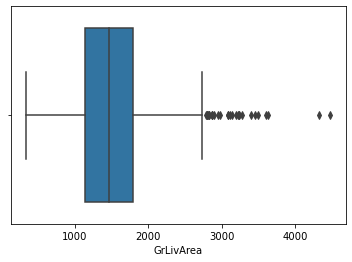

In [43]:
sns.boxplot(housing['GrLivArea'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalBsmtSF'>

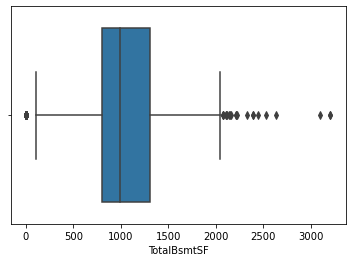

In [44]:
sns.boxplot(housing['TotalBsmtSF'])

In [45]:
Q1 = housing.quantile(0.25)    ## Returns a series of 1st quartile values  
Q3 = housing.quantile(0.75)    ## Returns a series of 3rd quartile values 
IQR = Q3 - Q1
LL = Q1 - 1.5 * IQR
UL = Q3 + 1.5 * IQR

In [46]:
box_plot_val_df = pd.concat([LL,Q1, Q3,UL], axis=1, keys=['LL','Q1', 'Q3','UL'])

box_plot_val_df.head(20)

,LL,Q1,Q3,UL
Id,-707.50,354.5,1062.5,2124.50
OverallQual,2.00,5.0,7.0,10.00
YearBuilt,1883.50,1954.0,2001.0,2071.50
TotalBsmtSF,39.50,797.0,1302.0,2059.50
GrLivArea,151.25,1131.5,1785.0,2765.25
FullBath,-0.50,1.0,2.0,3.50
GarageCars,-0.50,1.0,2.0,3.50
GarageArea,-56.50,323.0,576.0,955.50
SalePrice,2500.00,130000.0,215000.0,342500.00


### Lets handle the 'TotalBsmtSF' variable

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalBsmtSF'>

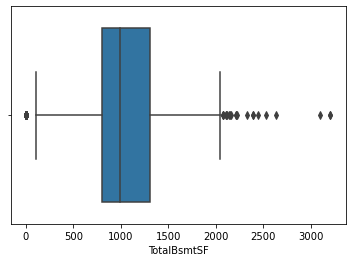

In [47]:
sns.boxplot(housing['TotalBsmtSF'])

In [48]:
box_plot_val_df.head(20)

,LL,Q1,Q3,UL
Id,-707.50,354.5,1062.5,2124.50
OverallQual,2.00,5.0,7.0,10.00
YearBuilt,1883.50,1954.0,2001.0,2071.50
TotalBsmtSF,39.50,797.0,1302.0,2059.50
GrLivArea,151.25,1131.5,1785.0,2765.25
FullBath,-0.50,1.0,2.0,3.50
GarageCars,-0.50,1.0,2.0,3.50
GarageArea,-56.50,323.0,576.0,955.50
SalePrice,2500.00,130000.0,215000.0,342500.00


In [49]:
# Drop those rows where 'TotalBsmtSF' > 3000

housing.drop(housing[housing['TotalBsmtSF']>3000].index, inplace=True)

In [50]:
housing[housing['TotalBsmtSF']>3000].shape[0]

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalBsmtSF'>

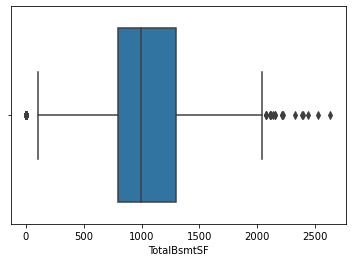

In [51]:
sns.boxplot(housing['TotalBsmtSF'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalBsmtSF'>

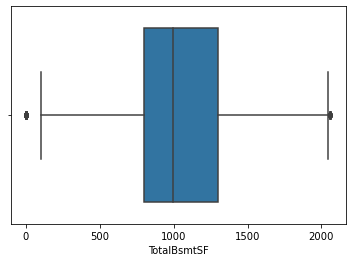

In [52]:
# Cap the outliers on the right side to value of UL
housing['TotalBsmtSF'] = np.where(housing['TotalBsmtSF'] > 2059.50, 2059.50,housing['TotalBsmtSF'])
sns.boxplot(housing['TotalBsmtSF'])

In [53]:
# Floor the outliers on the left side to value of LL

housing['TotalBsmtSF'] = np.where(housing['TotalBsmtSF'] < 39.50, 39.50,housing['TotalBsmtSF'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalBsmtSF'>

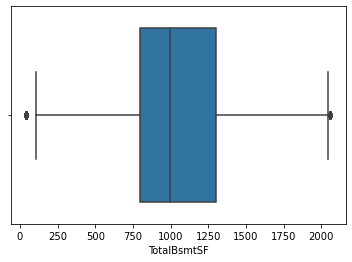

In [54]:
sns.boxplot(housing['TotalBsmtSF'])

##### This seems to be satisfactory enough.
##### So we can easily go ahead with it to keep it real. 

### Lets handle the 'GrLivArea' variable

Lets use the 3 standard deviation way of handling the outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GrLivArea'>

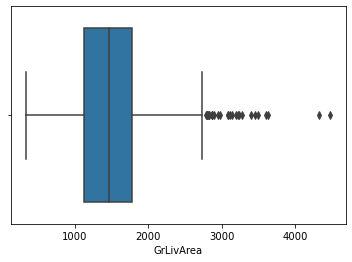

In [55]:
sns.boxplot(housing['GrLivArea'])

In [56]:
upper_limit = housing['GrLivArea'].mean() + 3*housing['GrLivArea'].std()
upper_limit

3035.160135701378

In [57]:
lower_limit = housing['GrLivArea'].mean() - 3*housing['GrLivArea'].std()
lower_limit

-9.825858080981334

In [58]:
# Lets drop those rows
housing.drop(housing[housing['GrLivArea']>upper_limit].index, inplace=True)
housing.drop(housing[housing['GrLivArea']<lower_limit].index, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GrLivArea'>

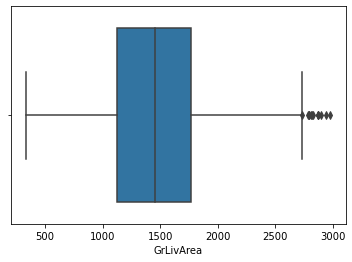

In [59]:
sns.boxplot(housing['GrLivArea'])

### Lets handle the 'GarageArea' variable

Lets use the z score method of handling the outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GarageArea'>

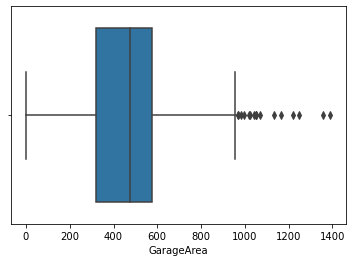

In [60]:
sns.boxplot(housing['GarageArea'])

In [61]:
# Add a new column in dataframe

housing['z_score_GarageArea'] = (housing['GarageArea'] - housing['GarageArea'].mean()) / housing['GarageArea'].std()

In [62]:
housing.head()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice,z_score_GarageArea
0,1,7,2003,856.0,SBrkr,1710,2,Attchd,2,548,208500,0.371064
1,2,6,1976,1262.0,SBrkr,1262,2,Attchd,2,460,181500,-0.043155
2,3,7,2001,920.0,SBrkr,1786,2,Attchd,2,608,223500,0.653486
3,4,7,1915,756.0,SBrkr,1717,1,Detchd,3,642,140000,0.813525
4,5,8,2000,1145.0,SBrkr,2198,2,Attchd,3,836,250000,1.726689


In [63]:
# Lets try capping

upper_limit = housing['GarageArea'].mean() + 3*housing['GarageArea'].std()
upper_limit

1106.512380942947

In [64]:
lower_limit = housing['GarageArea'].mean() - 3*housing['GarageArea'].std()
lower_limit

-168.17594572462207

In [65]:
housing['GarageArea'] = np.where(housing['z_score_GarageArea'] > 3, upper_limit, housing['GarageArea'])
housing['GarageArea'] = np.where(housing['z_score_GarageArea'] < -3, lower_limit, housing['GarageArea'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GarageArea'>

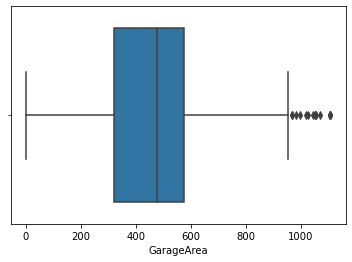

In [66]:
sns.boxplot(housing['GarageArea'])

In [67]:
housing.drop(columns='z_score_GarageArea',inplace=True)

In [68]:
housing.head()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
0,1,7,2003,856.0,SBrkr,1710,2,Attchd,2,548.0,208500
1,2,6,1976,1262.0,SBrkr,1262,2,Attchd,2,460.0,181500
2,3,7,2001,920.0,SBrkr,1786,2,Attchd,2,608.0,223500
3,4,7,1915,756.0,SBrkr,1717,1,Detchd,3,642.0,140000
4,5,8,2000,1145.0,SBrkr,2198,2,Attchd,3,836.0,250000


In [69]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1397 entries, 0 to 1417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           1397 non-null   int64  
 1   OverallQual  1397 non-null   int64  
 2   YearBuilt    1397 non-null   int64  
 3   TotalBsmtSF  1397 non-null   float64
 4   Electrical   1397 non-null   object 
 5   GrLivArea    1397 non-null   int64  
 6   FullBath     1397 non-null   int64  
 7   GarageType   1397 non-null   object 
 8   GarageCars   1397 non-null   int64  
 9   GarageArea   1397 non-null   float64
 10  SalePrice    1397 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 163.3+ KB


In [70]:
housing.isnull().sum()

Id             0
OverallQual    0
YearBuilt      0
TotalBsmtSF    0
Electrical     0
GrLivArea      0
FullBath       0
GarageType     0
GarageCars     0
GarageArea     0
SalePrice      0
dtype: int64

In [71]:
housing.shape

(1397, 11)

In [72]:
housing.head()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
0,1,7,2003,856.0,SBrkr,1710,2,Attchd,2,548.0,208500
1,2,6,1976,1262.0,SBrkr,1262,2,Attchd,2,460.0,181500
2,3,7,2001,920.0,SBrkr,1786,2,Attchd,2,608.0,223500
3,4,7,1915,756.0,SBrkr,1717,1,Detchd,3,642.0,140000
4,5,8,2000,1145.0,SBrkr,2198,2,Attchd,3,836.0,250000


## multiple linear regression

### collecting numerical data

In [73]:
numerical_cols = housing.select_dtypes(include = [np.number]).columns

In [74]:
numerical_cols

Index(['Id', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea',
       'FullBath', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

In [75]:
housing_numeric_df= housing[numerical_cols]

In [76]:
housing_numeric_df.shape

(1397, 9)

### collecting character data

In [77]:
character_cols = housing.select_dtypes(include = 'object').columns

In [78]:
character_cols

Index(['Electrical', 'GarageType'], dtype='object')

In [79]:
housing_character_df= housing[character_cols]

In [80]:
housing_character_df.shape

(1397, 2)

### making dummies

In [81]:
housing_dummies_df = pd.get_dummies(housing_character_df)

In [82]:
housing_dummies_df.head()

,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage
0,0,0,0,0,1,0,1,0,0,0,0,0
1,0,0,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,0,0


### combining numeric and dummies data frame

In [83]:
housing_combined_df = pd.concat([housing_numeric_df, housing_dummies_df], axis =1)

In [84]:
housing_combined_df.head()

,Id,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice,Electrical_FuseA,...,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage
0,1,7,2003,856.0,1710,2,2,548.0,208500,0,...,0,0,1,0,1,0,0,0,0,0
1,2,6,1976,1262.0,1262,2,2,460.0,181500,0,...,0,0,1,0,1,0,0,0,0,0
2,3,7,2001,920.0,1786,2,2,608.0,223500,0,...,0,0,1,0,1,0,0,0,0,0
3,4,7,1915,756.0,1717,1,3,642.0,140000,0,...,0,0,1,0,0,0,0,0,1,0
4,5,8,2000,1145.0,2198,2,3,836.0,250000,0,...,0,0,1,0,1,0,0,0,0,0


### splitting data

In [85]:
X = housing_combined_df.drop(columns = ['SalePrice'])
Y= housing_combined_df['SalePrice']

### test train split

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.7,random_state=100)

In [88]:
X_train.head()

,Id,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,GarageArea,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage
1412,1413,7,2004,1221.0,1221,2,2,400.0,0,0,0,0,1,0,1,0,0,0,0,0
802,803,6,1957,1392.0,1392,1,2,458.0,1,0,0,0,0,0,1,0,0,0,0,0
333,334,5,1941,616.0,1111,1,1,200.0,0,0,0,0,1,0,0,0,0,0,1,0
1255,1256,5,1892,994.0,2372,2,1,432.0,0,0,0,0,1,0,0,0,0,0,1,0
990,991,7,2005,1346.0,1504,2,2,437.0,0,0,0,0,1,0,1,0,0,0,0,0


### perform linear regressin

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
model = LinearRegression()

In [91]:
model.fit(X_train, Y_train)

LinearRegression()

In [92]:
model.coef_

array([-1.46891623e+00,  1.75098115e+04,  3.25888353e+02,  4.45994368e+01,
        5.36561057e+01, -1.03571899e+04,  5.50015642e+03,  5.25317905e+01,
        9.66393748e+02,  5.30611118e+03, -7.93084288e+03, -5.91171556e-12,
        1.65833795e+03, -3.62289296e+04,  3.09463772e+03, -4.41812634e+02,
        2.01984682e+04, -1.29004472e+04,  1.62683011e+03,  2.46512534e+04])

In [93]:
model.intercept_

-719680.1188955534

In [94]:
pd.DataFrame(model.coef_,X_train.columns)

,0
Id,-1.468916e+00
OverallQual,1.750981e+04
YearBuilt,3.258884e+02
TotalBsmtSF,4.459944e+01
GrLivArea,5.365611e+01
FullBath,-1.035719e+04
GarageCars,5.500156e+03
GarageArea,5.253179e+01
Electrical_FuseA,9.663937e+02
Electrical_FuseF,5.306111e+03


### prediction

In [95]:
Y_pred = model.predict(X_test)

In [96]:
Y_pred

array([289937.7854598 , 151586.00659843, 299008.06211172, 150657.16118833,
       189598.73889383, 228173.55075594,  83227.59734038, 153943.55388297,
       216122.39583167,  58744.04508464, 186935.88260421, 110805.68184808,
       210945.87313215, 219852.68103066, 103335.60210473, 319204.40197084,
       174378.61036745,  69945.35739818, 186661.93463342, 165701.08352083,
       130608.64122203, 121437.6775376 , 193684.43797789, 136188.14623293,
       221521.52590775, 185660.72161421, 220388.04687088, 262710.79823541,
       187810.04872593, 209034.49667289, 153074.68737361, 248061.05141837,
       168844.96278374, 257384.90225046,  90359.22695626, 230942.90181441,
       185010.92309864, 159061.49895688, 120832.54127301, 161619.96859011,
       335907.77850802, 191278.85057551, 257566.59648522, 110594.30109498,
        44911.42331046, 169391.16198388, 164809.18482627,  95075.23210618,
       195094.47923622,  48570.86915511,  88712.22491174, 200597.09488831,
       209890.97473013, 1

### errors of residual
diff bw pred and actual val of Y

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

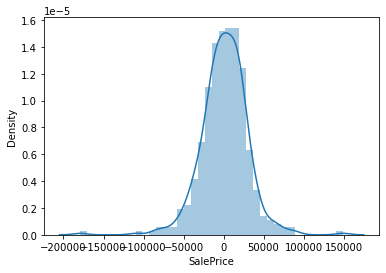

In [97]:
sns.distplot(Y_pred - Y_test)

<AxesSubplot:ylabel='SalePrice'>

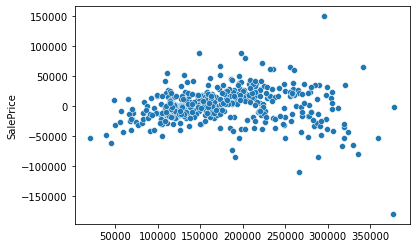

In [98]:
sns.scatterplot(x=Y_pred, y=(Y_pred - Y_test))

In [99]:
c = [i for i in range(0,len(Y_test))]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='SalePrice'>

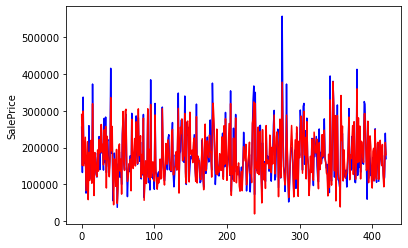

In [100]:
sns.lineplot(c, Y_test, color ='Blue')
sns.lineplot(c, Y_pred, color ='Red')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='SalePrice'>

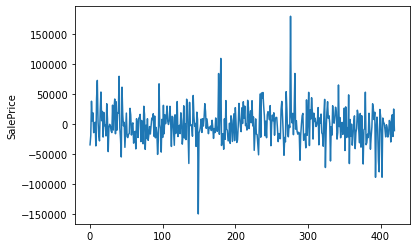

In [101]:
sns.lineplot(c, Y_test- Y_pred)

### model performance metrics

In [113]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [103]:
sqrt(mean_squared_error(Y_test, Y_pred))

28944.355376140255

In [104]:
r2_score(Y_test, Y_pred)

0.8345957743792596

In [105]:
# adjusted r square
# 1 - ((1- r2 )* (n-1)/(n - k - 1))
n = X_test.shape[0]
n

420

In [106]:
k = X_test.shape[1]
k

20

In [107]:
r2 = r2_score(Y_test, Y_pred)

In [108]:
adj_r2 = 1 - ((1- r2 )* (n-1)/(n - k - 1))
adj_r2

0.8263048357516536